In [8]:
# Import statements

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# inline matplotlib to show
%matplotlib inline

In [5]:
# Define ranges

RANGE = 25
CYTOPLASM_RANGE = 10

LUMEN_RED = 210 #105
LUMEN_GREEN = 110 #105
LUMEN_BLUE = 110 #205

CYTOPLASM_RED = 150 # 195.180.210
CYTOPLASM_GREEN = 150  #  (108, 140, 173);
CYTOPLASM_BLUE = 150 # (144, 147, 163);

NUCLEUS_RED = 100
NUCLEUS_GREEN = 100
NUCLEUS_BLUE = 130

LUMEN_LOW_RANGE = np.array([LUMEN_RED - RANGE, LUMEN_GREEN - RANGE, LUMEN_BLUE - RANGE], np.uint8)
LUMEN_HIGH_RANGE = np.array([LUMEN_RED + RANGE, LUMEN_GREEN + RANGE, LUMEN_BLUE + RANGE], np.uint8)

CYTOPLASM_LOW_RANGE = np.array([CYTOPLASM_RED - 25, CYTOPLASM_GREEN - 50, CYTOPLASM_BLUE - CYTOPLASM_RANGE])
CYTOPLASM_HIGH_RANGE = np.array([CYTOPLASM_RED + 25, CYTOPLASM_GREEN + 50, CYTOPLASM_BLUE + CYTOPLASM_RANGE])

NUCLEUS_LOW_RANGE = np.array([NUCLEUS_RED - 70, NUCLEUS_GREEN - 80, NUCLEUS_BLUE - 70])
NUCLEUS_HIGH_RANGE = np.array([NUCLEUS_RED + 70, NUCLEUS_GREEN + 80, NUCLEUS_BLUE + 60])

In [11]:
# Apply the masks

def apply_mask(imageYCC, image):
    cv.imshow("image1", imageYCC)
    imageYCC = cv.dilate(imageYCC, kernel = (5,5), iterations = 1)
    imageYCC = cv.dilate(imageYCC, kernel = (5,5), iterations = 1)
    cv.imshow("image", imageYCC)
    LUMEN_MASK = cv.inRange(imageYCC, LUMEN_LOW_RANGE, LUMEN_HIGH_RANGE)
    CYTOPLASM_MASK = cv.inRange(imageYCC, CYTOPLASM_LOW_RANGE, CYTOPLASM_HIGH_RANGE)
    NUCLEUS_MASK = cv.inRange(imageYCC, NUCLEUS_LOW_RANGE, NUCLEUS_HIGH_RANGE)

    LUMEN_MASK = LUMEN_MASK + NUCLEUS_MASK + CYTOPLASM_MASK

    result = cv.bitwise_and(imageYCC, imageYCC, mask=LUMEN_MASK)
    
    result = image.copy()
    result[LUMEN_MASK == 255] = [255,255,255]
    result[NUCLEUS_MASK == 255] = [255,255,255]
    result[CYTOPLASM_MASK == 255] = [255,105,180]

    # cv.imshow("result",np.hstack([imageYCC,image, result]))
    # cv.waitKey()
    # cv.destroyAllWindows()
    result = cv.cvtColor(result, cv.COLOR_YCR_CB2BGR)
    return result

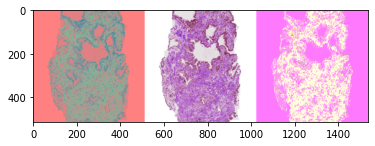

In [10]:
# driver code

image = cv.imread("images/0+0/03cbe5d39233a65cd7f64a81094ccc54_p_0.tiff", -1)
    
imageYCC = cv.cvtColor(image, cv.COLOR_BGR2YCR_CB)
result = apply_mask(imageYCC, image)

plt.imshow(np.hstack([imageYCC,image, result]))
plt.show()

In [ ]:
############# Code for Gland Boundary here #################

In [13]:
image = cv.imread("images/0+0/03cbe5d39233a65cd7f64a81094ccc54_p_0.tiff", -1)

In [16]:
# Define ranges and thresholds

NUCLEUS_RED = 100
NUCLEUS_GREEN = 100
NUCLEUS_BLUE = 130

# NUCLEUS_THRESHOLD = [128,0,128]
NUCLEUS_THRESHOLD = [90,255,cv.THRESH_BINARY]

NUCLEUS_LOW_RANGE = np.array([NUCLEUS_RED - 70, NUCLEUS_GREEN - 80, NUCLEUS_BLUE - 70])
NUCLEUS_HIGH_RANGE = np.array([NUCLEUS_RED + 70, NUCLEUS_GREEN + 80, NUCLEUS_BLUE + 60])

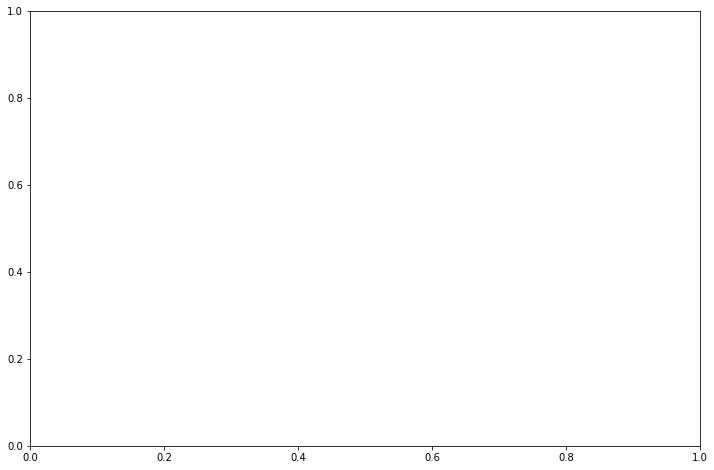

In [17]:
imageYCC = cv.cvtColor(image, cv.COLOR_BGR2YCR_CB)
gray = cv.cvtColor(image,cv.COLOR_RGB2GRAY)
edge = cv.Canny(gray, 60, 180)
fig, ax = plt.subplots(1, figsize=(12,8))

cnts 265
size elements total :  0
size of pic :  262144
rate of fullness : %  0.0


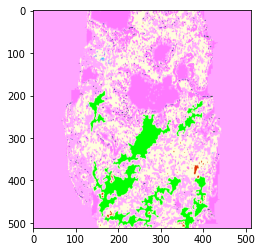

In [22]:
image = apply_mask(imageYCC, image)
# cv.imshow('once', result)

dimensions = image.shape

height= image.shape[0]
width = image.shape[1]
size = height*width

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (7, 7), 0)
cv.imshow("gray", gray)

_,thresh = cv.threshold(gray,240,255,cv.THRESH_BINARY)

cnts, hier = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
size_elements = 0
print("cnts", len(cnts))
cnts.pop()
cnts = [c for c in cnts if (cv.contourArea(c) > 500.0 and cv.contourArea(c) < 7000.0) ]
cv.drawContours(image,cnts, -1, (0, 255, 0), thickness=cv.FILLED)

plt.imshow(image)
print("size elements total : ", size_elements)
print("size of pic : ", size)
print("rate of fullness : % ", (size_elements/size)*100)
plt.show()